# Human Driver Drowsiness Detection

Devesh Pawar   I041

Yaashie Sabla  I052

Prisha Dhoot   I068

In [1]:
# Import TensorFlow library for deep learning tasks
import tensorflow as tf

# Import NumPy for numerical operations
import numpy as np

# Import PIL (Pillow) for image processing tasks
from PIL import Image, ImageOps

# Import the os module for file and directory operations
import os

# Import pandas for data manipulation and analysis
import pandas as pd

# Import TensorFlow's utility function for one-hot encoding
from tensorflow.keras.utils import to_categorical

# Import matplotlib's pyplot for data visualization
from matplotlib import pyplot as plt

# Import scikit-learn's model_selection for splitting datasets
from sklearn import model_selection

# Import seaborn for enhanced data visualization
import seaborn as sns

# Import Keras modules for building neural network models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Import scikit-learn's confusion_matrix for evaluating model performance
from sklearn.metrics import confusion_matrix


In [2]:
# Iterate through the contents of the specified directory
for i in os.listdir("C:/Users/deves/OneDrive/Desktop/Driver/mrlEyes_2018_01"):
  
  # Check if the file name starts with 's0'
  if(i[:2]=='s0'):
    
    # Create a full path to the subfolder containing the 's0' files
    minifolder= 'C:/Users/deves/OneDrive/Desktop/Driver/mrlEyes_2018_01/'+ i
    
    # Change the current working directory to the 'minifolder'
    os.chdir(minifolder)
    
    # Create a 'filename' variable with the desired path for the file
    filename='/content/data/'+i

In [3]:
# Change the CWD to a specific directory
os.chdir('C:/Users/deves/OneDrive/Desktop/Driver/mrlEyes_2018_01/')

In [4]:
# List the contents of the specified directory and get the first 10 items
os.listdir('C:/Users/deves/OneDrive/Desktop/Driver/mrlEyes_2018_01/')[:10]

['.DS_Store',
 'annotation.txt',
 's0002',
 's0003',
 's0004',
 's0005',
 's0006',
 's0007',
 's0008',
 's0009']

In [24]:
import os
import numpy as np
from PIL import Image, ImageOps

# Create empty lists to store data (images) and labels
data = []
label = []

# Specify the directory containing the image data
data_dir = 'C:/Users/deves/OneDrive/Desktop/Driver/mrlEyes_2018_01/'

# Loop through the contents of the specified directory
for i in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, i)

    # Check if it's a directory
    if os.path.isdir(subdir_path):
        
        # Loop through the files in the subdirectory
        for j in os.listdir(subdir_path+'/$filename/'):
            
            # Check if the file has one of the specified image extensions
            if j.endswith(('.jpg', '.jpeg', '.png', '.bmp')): 
                
                # Open the image file using PIL
                image = Image.open(os.path.join(subdir_path,'$filename', j))
               
                # Convert the image to grayscale   
                image = ImageOps.grayscale(image)
                
                # Resize the image to 52x52 pixels
                image = image.resize((52, 52))
                
                # Convert the image to a NumPy array
                image = np.array(image)
                
                # Append the processed image to the data list
                data.append(image)
                
                # Extract the label from the filename (assuming label is in the 17th character)
                if j[16] == '1':
                    label.append(1)
                else:
                    label.append(0)

# Now, data contains the processed images, and label contains the corresponding labels.


# Data Analysis

In [25]:
# Calculate the number of processed images (data) and corresponding labels
len(data),len(label)

(70015, 70015)

In [26]:
# Create a DataFrame with the 'label' list, naming the column 'target'
df=pd.DataFrame(label,columns=['target'])

# Count the number of samples with 'target' equal to 0 (Close Eyes)
Close = df[df['target']==0]['target'].count()

# Count the number of samples with 'target' equal to 1 (Open Eyes)
Open = df[df['target']==1]['target'].count()

# Calculate the percentage of Open Eyes
Open_percent = Open/(Open+Close)

# Calculate the percentage of Close Eyes
Close_percent = Close/(Close+Open)

# Print the statistics
print('Total Number of Open Eyes:',Open)

print('Total Number of Close Eyes:',Close)

print('Percentage of Open Eyes:',Open_percent*100,'%')

print('Percentage of Close Eyes:',Close_percent*100,'%')

Total Number of Open Eyes: 36261
Total Number of Close Eyes: 33754
Percentage of Open Eyes: 51.79033064343355 %
Percentage of Close Eyes: 48.20966935656645 %


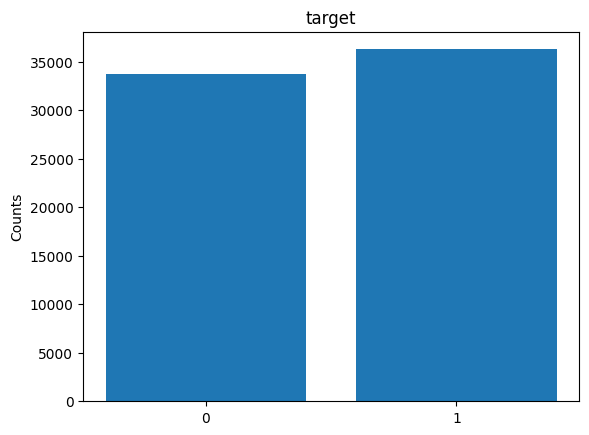

In [27]:
# Extract the 'target' column from the DataFrame
var = df['target']

# Count the occurrences of each unique value in the 'target' column
count = var.value_counts()

# Create a bar chart to visualize the distribution
plt.bar(count.index, count)

# Set the x-axis labels to be the unique values in 'target'
plt.xticks(count.index, count.index.values)

# Label the y-axis
plt.ylabel("Counts")

# Set the title of the plot
plt.title('target')

# Display the plot
plt.show()

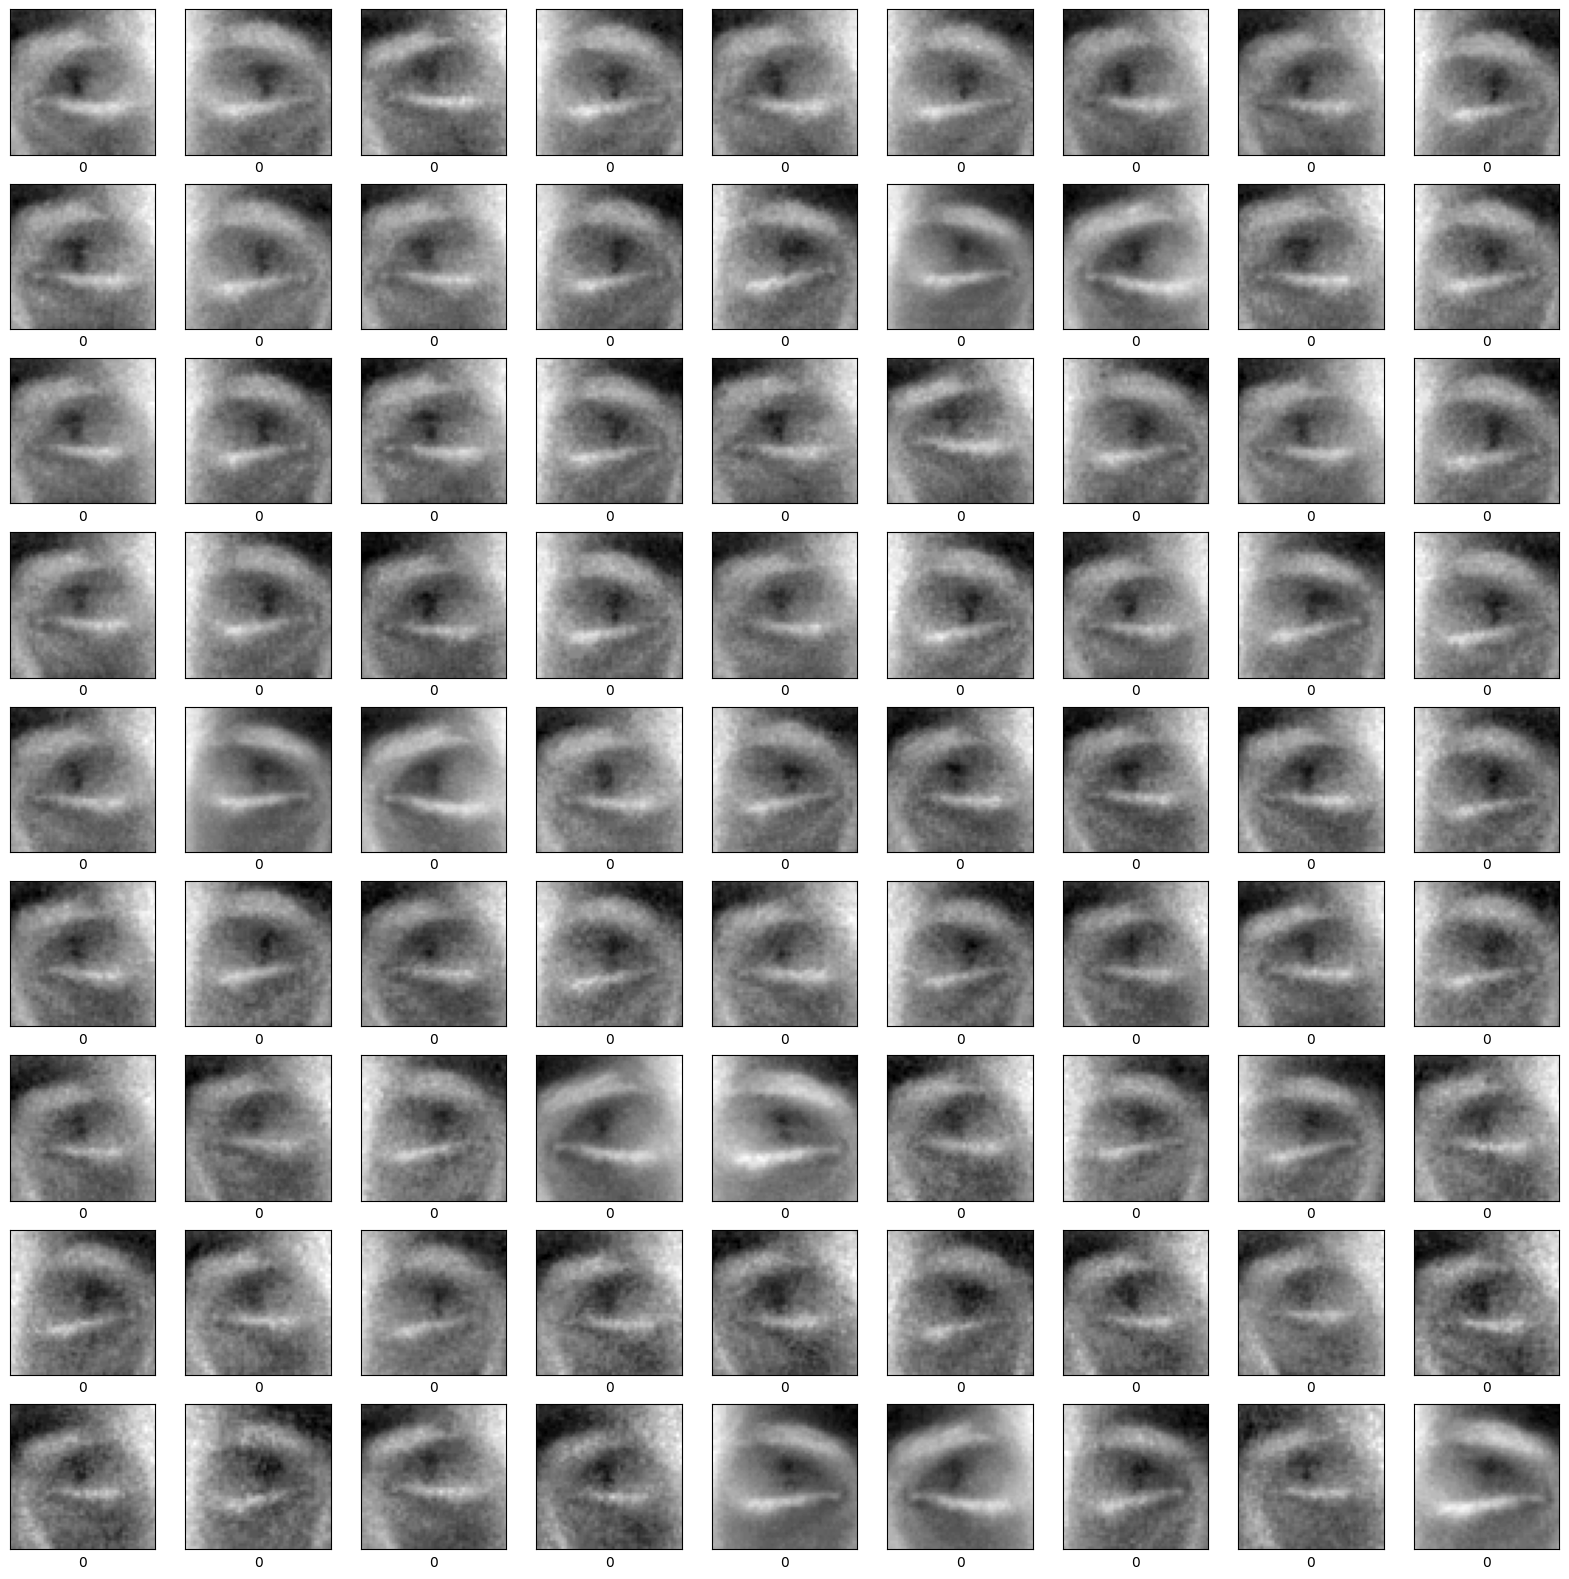

In [28]:
# Create a new figure with a specified figure size
plt.figure(figsize=(20,20))

# Iterate through a range (81 times)
for i in range(81):

    # Create a subplot in a 9x9 grid (9 rows, 9 columns)
    plt.subplot(9,9,i+1)
    
    # Remove x and y axis labels and ticks
    plt.xticks([])
    plt.yticks([])
    
    # Turn off grid lines
    plt.grid(False)
    
    # Display an image from the 'data' list at index (i+50)
    plt.imshow(data[i+50],cmap=plt.cm.binary)
    
    # Set the label for the x-axis (assuming 'label' contains class labels)
    plt.xlabel(label[i+50])

# Show the entire grid of images
plt.show()

# Data Preprocessing

In [29]:
# Convert the 'data' list to a NumPy array
data=np.array(data)

# Use to_categorical to one-hot encode the 'label' list
label=to_categorical(label)

# Print the first element of the 'data' array
print(data[0])

# Print the shape (dimensions) of the 'data' and 'label' arrays
print(data.shape)
print(label.shape)

[[109 108 109 ...  61  59  59]
 [110 109 107 ...  61  59  59]
 [110 110 108 ...  61  59  56]
 ...
 [ 74  71  70 ...  79  77  76]
 [ 75  73  71 ...  80  77  74]
 [ 76  71  69 ...  78  77  73]]
(70015, 52, 52)
(70015, 2)


In [30]:
# Normalize the image data by dividing it by 255.0
data=data/255.0

# Model Building

In [31]:
train_images,test_images,train_labels,test_labels=model_selection.train_test_split(data,label,test_size=0.33,random_state=42)

In [32]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(46910, 52, 52)
(46910, 2)
(23105, 52, 52)
(23105, 2)


In [33]:
# Reshape the training images to include an additional dimension with a size of 1
train_images=train_images.reshape(list(train_images.shape) + [1])

# Reshape the testing images to include an additional dimension with a size of 1
test_images=test_images.reshape(list(test_images.shape)+[1])

# Print the new shapes of the training and testing images
print(train_images.shape)
print(test_images.shape)

(46910, 52, 52, 1)
(23105, 52, 52, 1)


In [34]:
# Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
# Input shape is (52, 52, 1) indicating a 52x52 grayscale image
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(52,52,1)))


# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))


# Add another convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))


# Add another max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))


# Add another convolutional layer with 128 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))


# Add a dropout layer with a 25% dropout rate
model.add(Dropout(0.25))


# Flatten the output from the previous layer
model.add(Flatten())


# Add a fully connected dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))


# Add another dropout layer with a 50% dropout rate
model.add(Dropout(0.5))


# Add another fully connected dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))


# Add the output layer with 2 units and softmax activation (for binary classification)
model.add(Dense(2,activation='softmax'))

In [39]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


![Alt text](cnn.png)

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 dropout (Dropout)           (None, 9, 9, 128)         0

                                                                 
 flatten (Flatten)           (None, 10368)             0         
                                                                 
 dense (Dense)               (None, 128)               1327232   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1436674 (5.48 MB)
Trainable params: 1436674 (5.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history = model.fit(train_images, train_labels, epochs=15,batch_size=128,validation_data = (test_images,test_labels))

Epoch 1/15
367/367 [==============================] - 110s 293ms/step - loss: 0.2133 - accuracy: 0.9155 - val_loss: 0.1037 - val_accuracy: 0.9612
Epoch 2/15
367/367 [==============================] - 102s 278ms/step - loss: 0.0895 - accuracy: 0.9682 - val_loss: 0.0738 - val_accuracy: 0.9733
Epoch 3/15
367/367 [==============================] - 102s 278ms/step - loss: 0.0666 - accuracy: 0.9758 - val_loss: 0.0629 - val_accuracy: 0.9776
Epoch 4/15
367/367 [==============================] - 105s 286ms/step - loss: 0.0531 - accuracy: 0.9803 - val_loss: 0.0470 - val_accuracy: 0.9830
Epoch 5/15
367/367 [==============================] - 105s 285ms/step - loss: 0.0459 - accuracy: 0.9830 - val_loss: 0.0511 - val_accuracy: 0.9821
Epoch 6/15
367/367 [==============================] - 104s 284ms/step - loss: 0.0409 - accuracy: 0.9854 - val_loss: 0.0419 - val_accuracy: 0.9844
Epoch 7/15
367/367 [==============================] - 109s 296ms/step - loss: 0.0366 - accuracy: 0.9865 - val_loss: 0.0441 -

# Model Evaluation

In [104]:
model.evaluate(test_images,test_labels,batch_size=64)

362/362 [==============================] - 5s 13ms/step - loss: 0.0314 - accuracy: 0.9897


[0.031401824206113815, 0.9896991848945618]

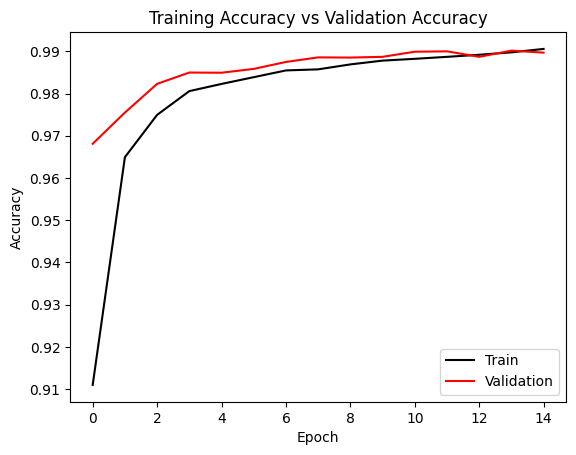

In [105]:
plt.plot(history.history['accuracy'], color='black',)
plt.plot(history.history['val_accuracy'], color='red',)
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

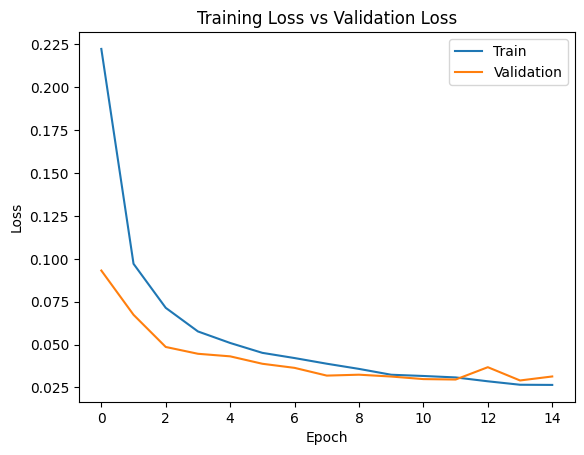

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Confusion Matrix


In [40]:
# Predict the values from the validation dataset
Y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx = pd.DataFrame(confusion_mtx , index = [i for i in range(2)] , columns = [i for i in range(2)])
print(confusion_mtx)

723/723 [==============================] - 32s 43ms/step
       0      1
0  10887    262
1     47  11909


# Plot heat map

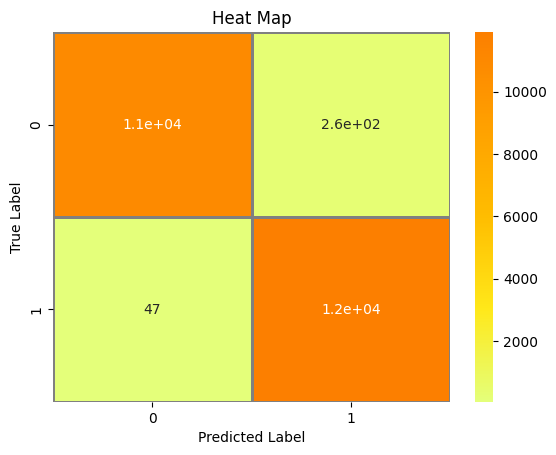

In [41]:
sns.heatmap(confusion_mtx, annot=True, linewidths=1,cmap="Wistia",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Heat Map")
plt.show()

# Saving the model

In [42]:
model.save('C:/Users/deves/OneDrive/Desktop/Driver/model_CNN.h5', overwrite=True)

C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Conclusion

Till now we've implemented these things:

1. Data preprocessing
2. Data analysis
3. Model building
4. Model evaluation
5. Confusion matrix
6. Heat map

Things left to implement:
1. Testing the model on test dataset
2. Implementing it in real life


# Your comments

Want to see real time implementation of the project